# Центральная предельная теорема
## Распределение Рэлея


Полезные ссылки:

https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D1%8D%D0%BB%D0%B5%D1%8F

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html

$ {E} [X]={\sqrt  {{\frac  {\pi }{2}}}}\sigma $

$ {D} [X]=\left(2-\pi /2\right){{\sigma }^{{2}}}$

, где $\sigma$ - параметр масштаба

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [5]:
sigma = 1. # параметр масштаба
ex = np.sqrt(np.pi/2) * sigma
dx = (2 - np.pi/2) * sigma ** 2
print('Математическое ожидание:', ex)
print('Дисперсия:', dx)

Математическое ожидание: 1.2533141373155001
Дисперсия: 0.42920367320510344


### Сгенерируем выборку объёма 1000, построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины

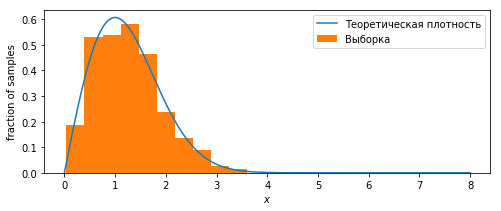

In [6]:
r = sts.rayleigh(scale=sigma)
sample = r.rvs(size=1000)

plt.figure(figsize=(8,3))
x = np.linspace(0,8,1000)
pdf = r.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность')

plt.hist(sample, density=True, label='Выборка')
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()

### Генерации распределения выборочных средних по ЦПТ

In [7]:
def means_sample(n=10):
    means = []

    for i in range(1000):
        subset = np.random.choice(sample, n)
        means.append(np.mean(subset))
        
    return means

### Функция генерации нормального распределния для n

In [8]:
def norm(n=10):
    ex = np.sqrt(np.pi/2) * sigma
    dx = (2 - np.pi/2) * sigma ** 2
    std = np.sqrt(dx/n)
    return sts.norm(ex, std)  

### Функция отображения графиков

In [9]:
def draw(n=10):
    plt.hist(means_sample(n), density=True, label='Выборка средних')
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.title(f'n={n}')

    norm_rv = norm(n)
    
    x = np.linspace(0,3,1000)
    pdf = norm_rv.pdf(x) 
    plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5, color='r')
    plt.legend()

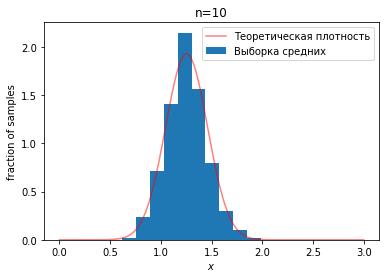

In [10]:
draw(10)

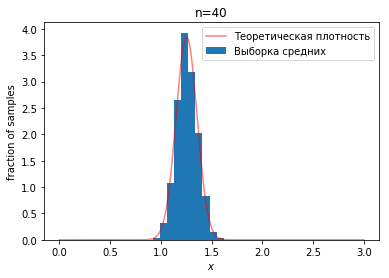

In [11]:
draw(40)

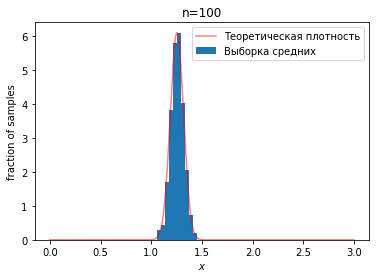

In [12]:
draw(100)

### Опишите разницу между полученными распределениями при различных значениях n. 
При увеличении n распределение вытягивалось вдоль оси равной математическому ожиданию (дисперсия уменьшалась)

### Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?
С ростом n точность аппроксимации увеличивается, при большом параметре n нормальное распределение лучше описывает распределение выборочных средних.